
<hr style="border-width:2px;border-color:#75DFC1">
<center><h1> Data visualization avec Seaborn</h1></center>
<center><h2>Analyse statistique multivariée</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


In [1]:
## Exécuter la cellule pour importer les packages/fichiers nécessaires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme() # pour modifier le thème

df = pd.read_csv('nba_sb2.csv', index_col= 0)

### Relation entre plusieurs variables quantitatives - partie 1

> La visualisation est une étape importante voire nécessaire de l'analyse de la relation entre deux ou plusieurs variables.

> Pour représenter visuellement la relation entre deux variables, les méthodes les plus fréquentes sont les nuages de points et les tracés de courbes.

> Les fonctions [**`scatterplot`**](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) et [**`lineplot`**](http://seaborn.pydata.org/generated/seaborn.lineplot.html) permettent d'afficher respectivement nuages de points et courbes.

> Cependant, dans la suite de l'exercice nous utiliserons la fonction [**`relplot`**](http://seaborn.pydata.org/generated/seaborn.relplot.html) qui utilise l'une ou l'autre de ces fonctions, et permet de surcroît de générer des graphes multiples.

> Par défaut la fonction **`relplot`** affiche un nuage de points. Elle prend comme arguments principaux un nom de variable dans **x**, un nom de variable dans **y**, et le nom du dataframe utilisé dans **data**. 

<div class='alert alert-warning'>
<i class='fa fa-exclamation-circle'></i> &emsp; 
Il est également possible d'entrer des variables / listes / séries directement dans les arguments <b>x</b> et <b>y</b> mais la méthode consistant à faire appel à un <i>data frame</i> est plus intuitive et permet plus de flexibilité. </div>

* Afficher un nuage de points entre les variables __'orb'__ et __'pts'__ de **`df`**.

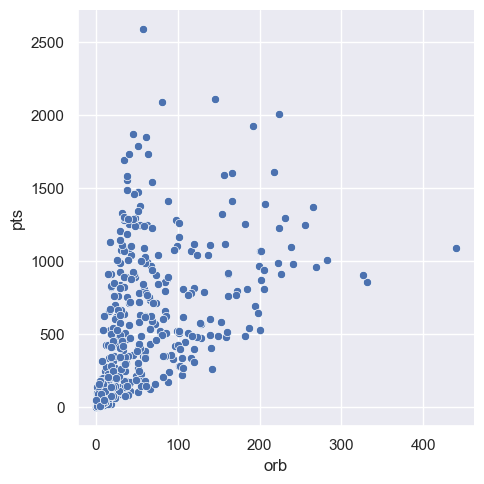

In [2]:
## Insérez votre code ici
sns.relplot(x="orb",y="pts",data=df);


> Dans le graphique, il est possible de rajouter jusqu'à 3 variables supplémentaires grâce aux arguments: `hue`, `size` et `style`.
>
> L'argument **`hue`** permet de différencier les points du graphique en les colorant en fonction d'une autre variable. Si la variable est catégorielle, chaque modalité sera représentée par une couleur distincte; si la variable est quantitative, ses valeurs seront représentées par un dégradé de couleurs crée.
>
> L'argument **`size`** opère de la même manière, la taille des points est modifiée en fonction d'une variable qualitative ou quantitative.
>
> L'argument **`style`** crée des formes différentes pour chaque modalité d'une variable qualitative uniquement.

* Afficher un nuage de points entre les variables **'pf'** et **'stl'** de **`df`**, colorés en fonction de la variable **'po'**.

In [3]:
df.head()

,pos,age,bref_team_id,g,gs,mp,fg.,efg.,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,po,conf
player,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,20,OKC,81,20,1197,0.503,0.503,0.581,142,190,332,43,40,57,71,203,265,F,West
Arron Afflalo,SG,28,ORL,73,73,2552,0.459,0.522,0.815,32,230,262,248,35,3,146,136,1330,NP,West
Alexis Ajinca,C,25,NOP,56,30,951,0.546,0.546,0.836,94,183,277,40,23,46,63,187,328,NP,East
Cole Aldrich,C,25,NYK,46,2,330,0.541,0.541,0.867,37,92,129,14,8,30,18,40,92,NP,East
LaMarcus Aldridge,PF,28,POR,69,69,2498,0.458,0.459,0.822,166,599,765,178,63,68,123,147,1603,FT,West


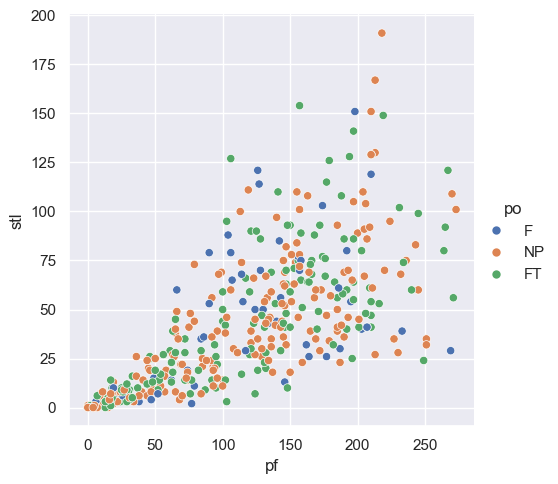

In [5]:
## Insérez votre code ici
sns.relplot(x='pf',y='stl',data=df,hue='po')


* Afficher un nuage de points entre les variables **'mp'** et **'age'** de **df**, avec des points de formes distinctes en fonction de la variable **'pos'**, de tailles différentes en fonction de la variable **'po'** et colorés en fonction de la variable **'age'**.

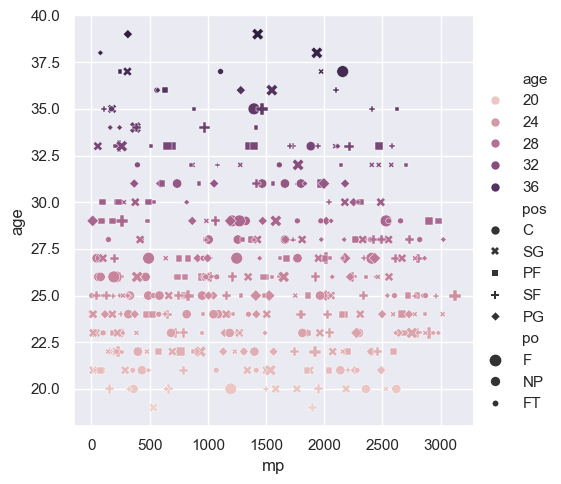

In [6]:
## Insérez votre code ici
sns.relplot(x='mp',y='age',data=df,style='pos',size='po',hue='age');


> Pour afficher une courbe de relation entre deux variables continues, il suffit d'ajouter l'argument `kind = 'line'` à la fonction **`relplot`** (par défaut `kind = 'scatter`).

* Afficher une courbe entre les variables **'gs'** et **'pf** de **df**.

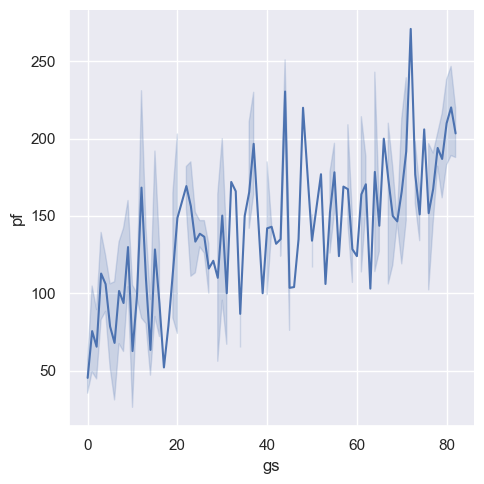

In [6]:
## Insérez votre code ici
sns.relplot(x='gs',y='pf',data=df, kind='line');


> Par défaut, la fonction ordonne les points de manière croissante par rapport à la variable en abscisse.

* Afficher une courbe entre les variable **g** et **pf** des individus appartenant à **`df`** ayant joué plus de 60 matchs durant la saison (*`df[df.g>60]`*)

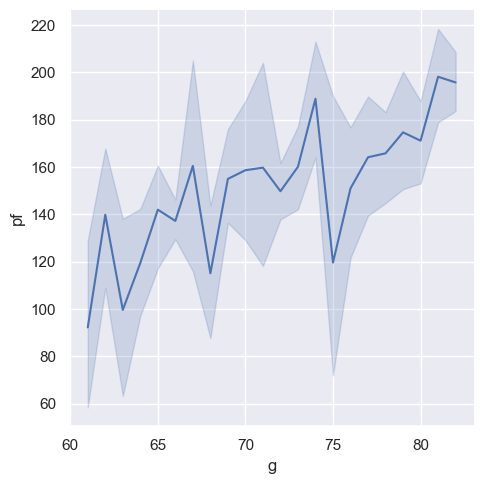

In [7]:
## Insérez votre code ici

sns.relplot(x='g',y='pf',data=df[df['g']>60],kind='line');

> Par défaut, lorsque plusieurs points partagent les mêmes coordonnées en abscisse, la fonction crée un intervalle de confiance; affiché comme une ombre autour de la courbe. Pour la supprimer, il suffit de régler le paramètre **`ci`** sur **`None`**.

> Les arguments `hue, size, style` fonctionnent comme pour les nuages de points, mais créent une courbe différente pour chaque modalité de la variable séparatrice.

* Afficher le même graphique que précédemment, mais sans l'intervalle de confiance, et avec une courbe par modalité de la variable **'po'**.

In [9]:
import warnings
warnings.filterwarnings('ignore')

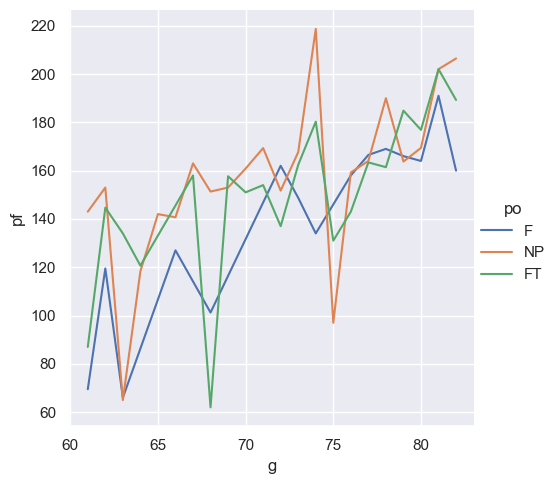

In [10]:
## Insérez votre code ici
sns.relplot(x='g',y='pf',data=df[df['g']>60],ci=None,hue='po',kind='line');


> L'un des principaux avantages de la fonction **`relplot`** est, comme mentionné en introduction, qu'elle construit un objet ***FacetGrid*** par défaut, qui lui permet d'afficher plusieurs graphiques à l'intérieur d'une même figure très facilement.

> Les arguments **`row`** et **`col`** permettent ainsi de rajouter jusqu'à deux variables supplémentaires aux graphes, en créant plusieurs graphiques, séparés par rapport à une variable catégorielle le long de l'axe horizontal et/ou vertical.

* Afficher plusieurs nuages de points représentant le nombre de points marqués en fonction du nombre de matchs joués, colorés en fonction du poste des joueurs et séparés par colonnes en fonction de la variable **'po'**. 

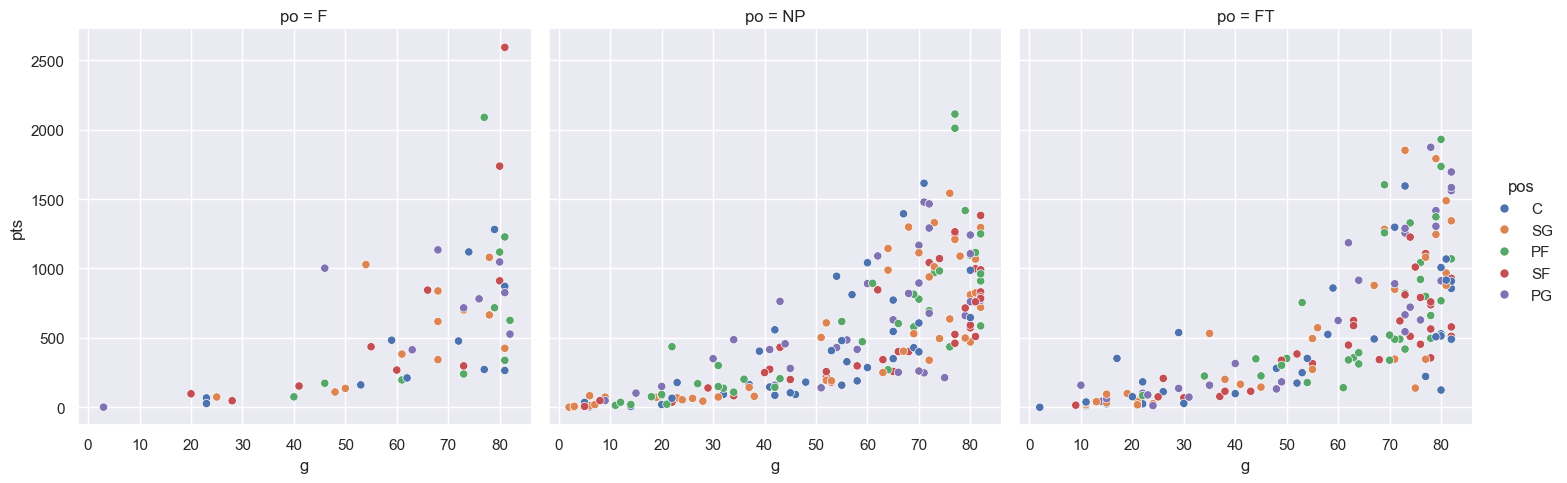

In [9]:
## Insérez votre code ici
sns.relplot(x='g',y='pts',hue='pos',col='po',data=df)


* Afficher des courbes de relation entre le nombre de minutes jouées (`'mp'`) et le nombre de fautes personnelles commises(`'pf'`), de styles et de couleurs différents en fonction du poste des joueurs(`'pos'`), séparés par lignes en fonction des conférences (`conf`), et par colonnes en fonction du niveau des équipes dans la compétition (`'po'`).

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Il est parfois utile de modifier la taille du/des graphique(s) à l'intérieur de la figure, à l'aide du paramètre <code style = "background-color: transparent ; color : inherit"><b>height</b></code>.
</div>`

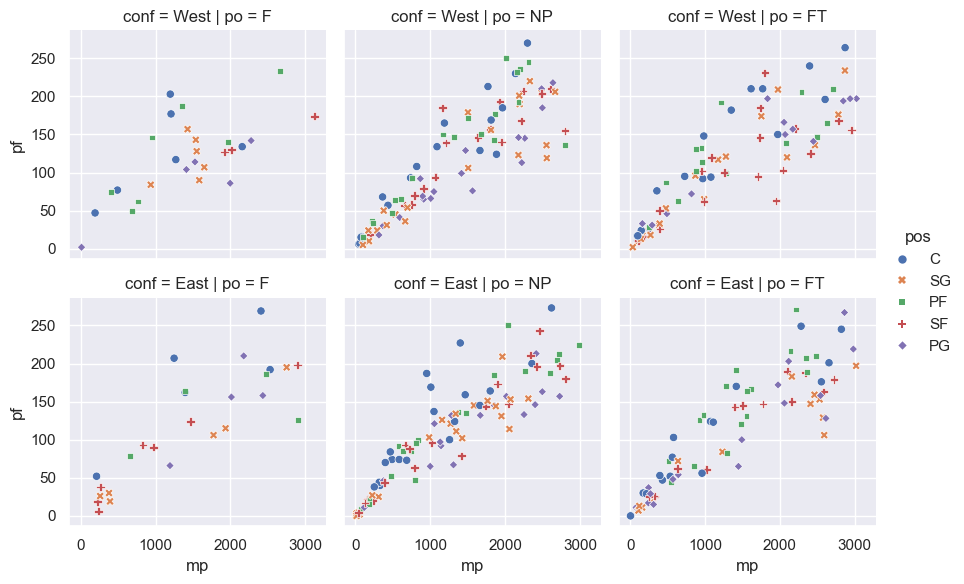

In [13]:
## Insérez votre code ici
sns.relplot(x='mp',y='pf',style='pos',hue='pos',row='conf',col='po',data=df, height=3);


> Parfois, le nombre de modalités d'une variable est élevée, et il est alors plus facile de visualiser les différents graphes séparés selon ces modalités, à la fois sur les lignes et les colonnes.<br>
> Pour cela, lorsqu'on divise les graphiques par colonnes, il est possible de rajouter le paramètre `col_wrap = k` pour indiquer le nombre de colonnes maximal **k** que l'on souhaite afficher par ligne. Si le nombre de modalités est supérieur à **k**, les graphiques correspondant aux k premières modalités seront affichés sur la première ligne, les suivants sur la seconde, etc..

><div class="alert alert-danger">
<i class='fa fa-exclamation-triangle'></i> &emsp; 
Le paramètres <code style = "background-color: transparent ; color : inherit"><b>col_wrap</b></code> n'est pas compatible avec le paramètre <code style = "background-color: transparent ; color : inherit"><b>row</b></code>.
</div>

* Afficher les mêmes courbes que précédemment (`x="mp", y="pf", style='pos', hue ='pos'`), mais en séparant les graphiques en fonctions de la colonne **'pos'** et en gardant au maximum 3 graphiques par ligne.

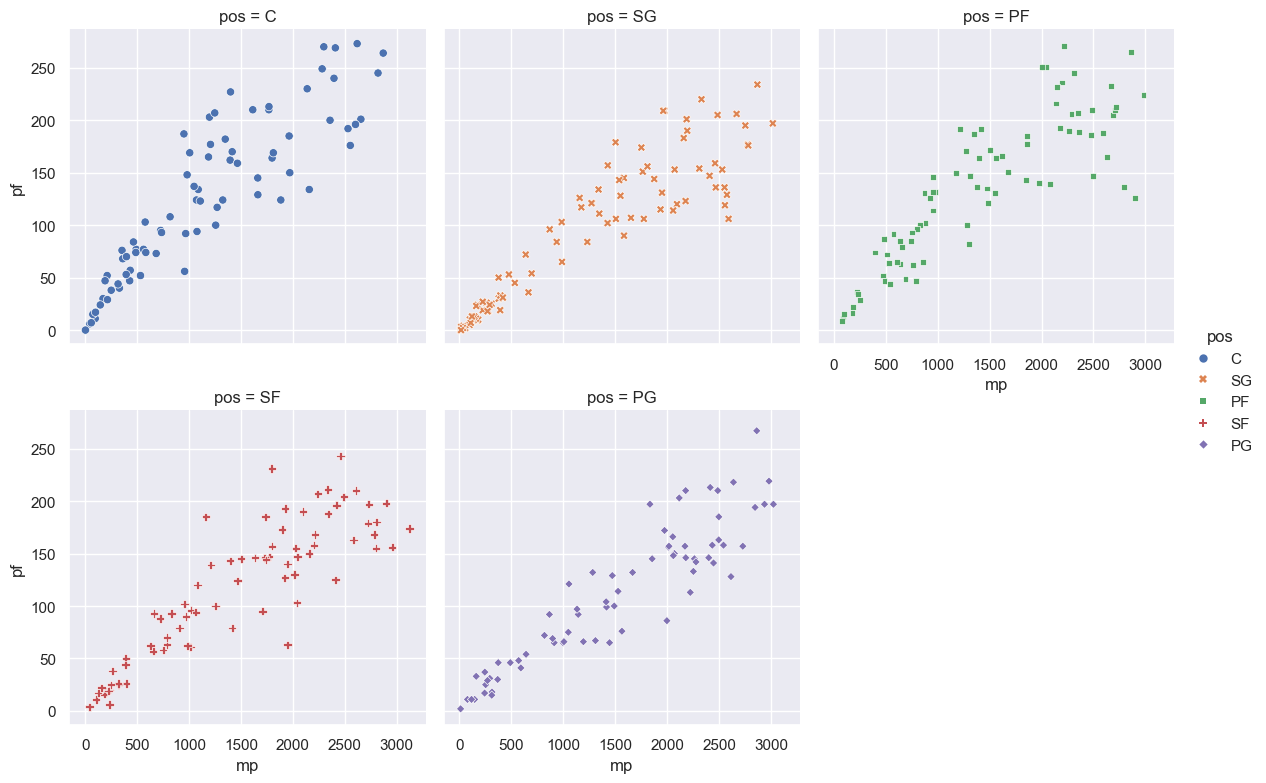

In [15]:
## Insérez votre code ici
sns.relplot(x='mp',y='pf',style='pos',hue='pos',col='pos', col_wrap=3,data=df, height=4);
